In [139]:
import gym
import time
import numpy as np
np.set_printoptions(threshold=sys.maxsize)
import matplotlib.pyplot as plt
import seaborn as sn
from matplotlib.colors import LinearSegmentedColormap

W = LinearSegmentedColormap.from_list('w', ["w", "w"], N=256)

In [140]:
STATES = np.arange(0,10)
ACTIONS = [-1,1]

In [141]:
class RandomWalk:

    def __init__(self):
        self.feature_len = 1
        self.w = np.ones((len(STATES),self.feature_len))
        #Features - [Current State]  and [Len From Right]
        self.features = np.ones((len(STATES),self.feature_len))
        self.alpha = 0.00002
        self.discount =1

    def reset(self):

        state = int(len(STATES)/2)
        return state

    def step(self,state,action):
        done = False
        if state == 0 or state == len(STATES)-1:
            done = True
            
            if state == 0:
                reward = -10
            
            elif state == len(STATES)-1:
                reward = 10000

            return state,reward,done

        next_state = state + action 
        reward = 0

        return next_state,reward,done

    def get_episode(self):

        state = self.reset()

        trajectory = []

        while True:

            _action_ = np.random.randint(2)

            action = ACTIONS[_action_]

            next_state,reward,done = self.step()

            trajectory.append((state,action,reward))

            state = next_state

            if done:
                break

        return trajectory


    def get_action(self):

        _action_ = np.random.randint(2)
        action = ACTIONS[_action_]

        return action


    #Features - [Current State]  and [Len From Right]

    def Monte_Carlo_Approx(self):

        state = self.reset()

        while True:

            action = self.get_action()

            next_state,reward,done = self.step(state,action)


            self.features[state] = (len(STATES) - 1) - state

            Value_S = np.dot(self.w[state],self.features[state])

            Value_N_S = np.dot(self.w[next_state],self.features[next_state])

            self.w[state] += self.alpha*((reward + self.discount*(Value_N_S)) - Value_S)*self.features[state]


            if done:
                break

            state = next_state

        return self.w


    def loop(self):

        for x in range(10000):
            print("In Loop {:.5f}".format(x), end="\r")
            self.w = self.Monte_Carlo_Approx()

        values = self.w*self.features
        plt.figure(figsize=(12,8))
        plt.plot(STATES,values)
        print('Plotting...')
        plt.show()

        return self.w

            


In [142]:
env = RandomWalk()

Plotting...


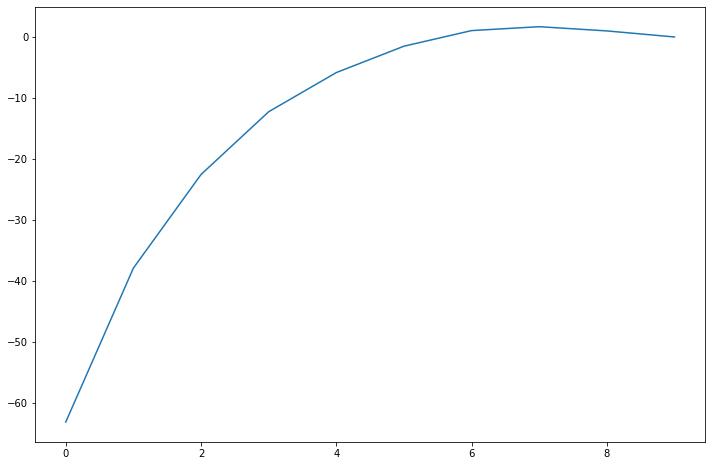

In [143]:
w = env.loop()

In [144]:
w

array([[-7.0208    ],
       [-4.74086263],
       [-3.22388259],
       [-2.0449343 ],
       [-1.16882239],
       [-0.37861094],
       [ 0.34908708],
       [ 0.84339993],
       [ 0.99209522],
       [ 1.        ]])